In [1]:
# Imporiting files and declaring variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [17]:
# Reading the data
data = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/heart_disease_prediction/Data/raw/cleveland_dataset.csv')

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# Dimentionality reduction using PCA, ICA and LDA

Explained variance ratio:  [0.23559601 0.12332151 0.09549185]


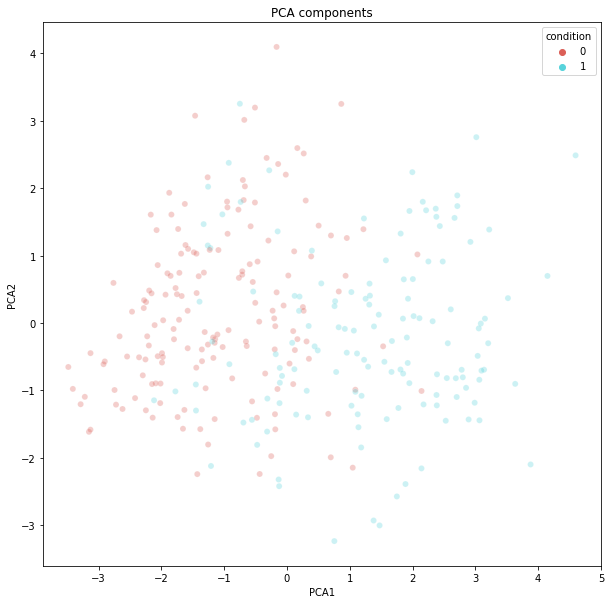

In [20]:
#  Implementing the PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Seperate the features from the dataframe
features =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
x = data.loc[:, features].values

# Seperate the target from the dataframe
y = data.loc[:, ['condition']].values

# Standardize the features
x = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

# Create a dataframe with the two components
df_pca = pd.DataFrame(data=principalComponents,
                            columns=['PCA1', 'PCA2', 'PCA3'])

# Reset the index of the target
targetDf = data['condition'].reset_index(drop=True)

# Concatenate the target and the PCA components
df_pca = pd.concat([df_pca, targetDf], axis=1)

print('Explained variance ratio: ', pca.explained_variance_ratio_)

# Plot the PCA components
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='condition',
    palette=sns.color_palette('hls', 2),
    data=df_pca,
    legend='full',
    alpha=0.3
)
plt.title('PCA components')
plt.show()

# Save the PCA components
df_pca.to_csv(
    '/Users/vitthal/Documents/GitHub/heart_disease_prediction/Data/csv/pca_components.csv', index=False)


<Figure size 720x720 with 0 Axes>

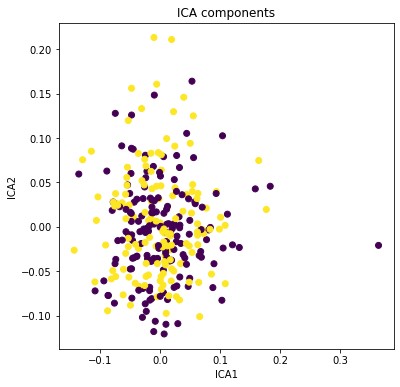

In [21]:
#  Implementing the ICA
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Seperate the features from the dataframe
features =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
x = data.loc[:, features].values

# Seperate the target from the dataframe
y = data.loc[:, ['condition']].values

# Standardize the features
x = data.loc[:, features].values

# Apply ICA
ica = FastICA(n_components=3)
principalComponents = ica.fit_transform(x)

# Create a dataframe with the two components
df_ica = pd.DataFrame(data=principalComponents,
                            columns=['ICA1', 'ICA2', 'ICA3'])

# Reset the index of the target
targetDf = data['condition'].reset_index(drop=True)

# Concatenate the target and the ICA components
df_ica = pd.concat([df_ica, targetDf], axis=1)

# Plot the ICA components
plt.figure(figsize=(10, 10))
fig = plt.figure(figsize=(6, 6))
plt.scatter(df_ica['ICA1'], df_ica['ICA2'], c=df_ica['condition'], cmap='viridis')
plt.xlabel('ICA1')
plt.ylabel('ICA2')
plt.title('ICA components')
plt.show()

# Save the ICA components
df_ica.to_csv(
    '/Users/vitthal/Documents/GitHub/heart_disease_prediction/Data/csv/ica_components.csv', index=False)

In [19]:
#  Implementing LDA for dimensionality reduction

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

data= pd.read_csv(
    '/Users/vitthal/Documents/GitHub/heart_disease_prediction/Data/raw/cleveland_dataset.csv')

# Seperate the features from the dataframe
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
            'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
x = data.loc[:, features].values

# Seperate the target from the dataframe
y = data.loc[:, ['condition']].values

# Standardize the features
x = StandardScaler().fit_transform(x)

# Apply LDA
lda = LDA(n_components= 3)
principalComponents = lda.fit_transform(x, y.ravel())

# Create a dataframe with the two components
df_lda = pd.DataFrame(data=principalComponents,
                            columns=['LDA1', 'LDA2', 'LDA3'])
                            
# Reset the index of the target
targetDf = data['condition'].reset_index(drop=True)

# Concatenate the target and the LDA components
df_lda = pd.concat([df_lda, targetDf], axis=1)

# Plot the LDA components
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x='LDA1', y='LDA2',
    hue='condition',
    palette=sns.color_palette('hls', 2),
    data=df_lda,
    legend='full',
    alpha=0.3
)
plt.title('LDA components')
plt.show()


[[69.  1.  0. ...  1.  1.  0.]
 [69.  0.  0. ...  0.  2.  0.]
 [66.  0.  0. ...  2.  0.  0.]
 ...
 [35.  1.  3. ...  1.  0.  2.]
 [35.  0.  3. ...  0.  0.  0.]
 [35.  1.  3. ...  0.  0.  2.]]


ValueError: n_components cannot be larger than min(n_features, n_classes - 1).